In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Task 1a

In [3]:
# Load the csv file as a pandas dataframe
vgsales = pd.read_csv('vgsales.csv')

In [4]:
# Checking the dimesions of the dataset
vgsales.shape

(16598, 11)

Task 1b

In [5]:
# Checking which columns contain missing values
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [62]:
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
# Removing the rows containing empty values
vgsales = vgsales.dropna(subset=['Year', 'Publisher'], axis=0).reset_index(drop=True)

In [7]:
# Check to see if there exists any duplicates in the data
vgsales.duplicated().sum()

0

In [8]:
# Filtering by numeric features to visualize the outliers later
numeric_features = ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 
                    'JP_Sales', 'Other_Sales', 'Global_Sales']

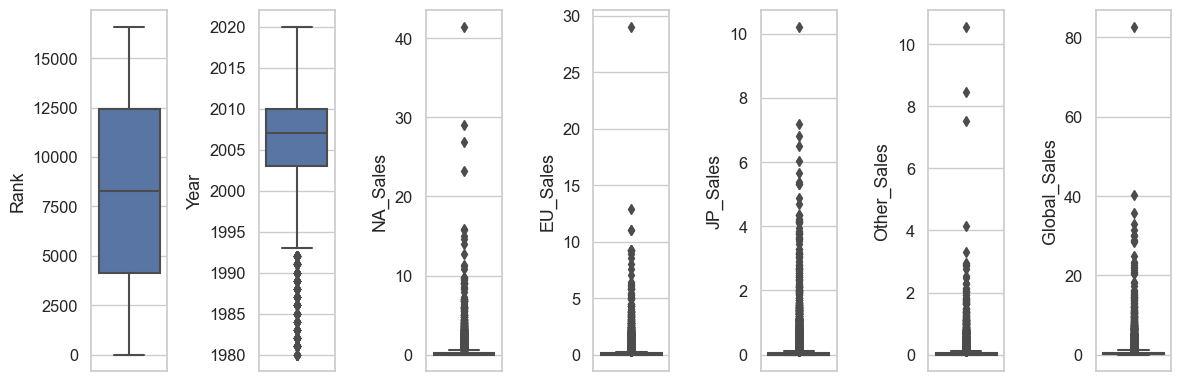

In [9]:
# Using a boxplot to visualize outliers
plt.figure(figsize=(12,4))
sns.set(font_scale=1.07)
sns.set_style('whitegrid')
for i in range(len(numeric_features)):
    plt.subplot(1, len(numeric_features), i+1)
    sns.boxplot(y=vgsales[numeric_features[i]], orient='v')
    plt.tight_layout()
plt.savefig("Boxplot_with_outliers.jpg")

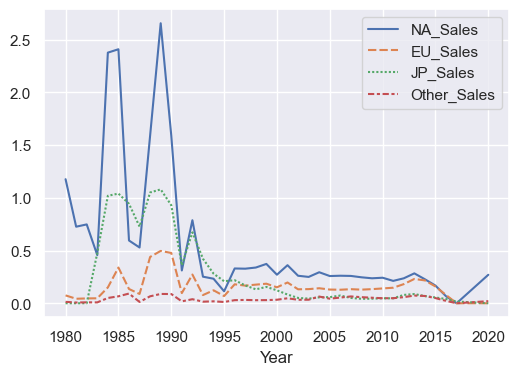

In [10]:
sales_list = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
annual_sales = vgsales[sales_list].groupby(['Year']).mean()
sns.set_theme()
plt.figure(figsize=(6, 4))
sns.lineplot(data=annual_sales)
plt.savefig('Sales_with_outliers.jpg')

In [11]:
# Remove outliers from the data using the IQR method
print(f'Entries before filtering: {len(vgsales)}')
filtered = np.array([True] * len(vgsales))
print(len(vgsales))
columns_with_outliers = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for columns in columns_with_outliers:
    q1 = vgsales[columns].quantile(0.25)
    q3 = vgsales[columns].quantile(0.75)
    iqr = q3 - q1
    low_outliers = q1 - (iqr * 1.5)
    high_outliers = q3 + (iqr * 1.5)
    filtered = ((vgsales[columns] >= low_outliers) & (vgsales[columns] <= high_outliers)) & filtered
vgsales_IQR = vgsales[filtered]
print(f'Entries after filtering: {len(vgsales_IQR)}')

Entries before filtering: 16291
16291
Entries after filtering: 11675


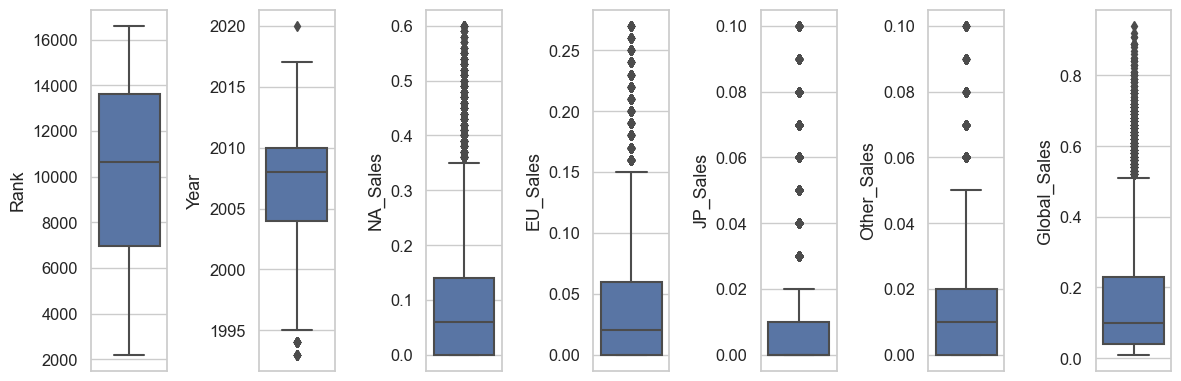

In [12]:
plt.figure(figsize=(12,4))
sns.set(font_scale=1.07)
sns.set_style('whitegrid')
for i in range(len(numeric_features)):
    plt.subplot(1, len(numeric_features), i+1)
    sns.boxplot(y=vgsales_IQR[numeric_features[i]], orient='v')
    plt.tight_layout()
plt.savefig('Boxplot_IQR.jpg')

<Axes: xlabel='Year'>

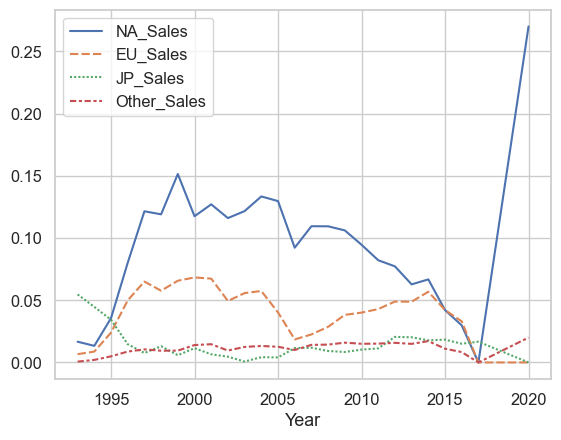

In [13]:
annual_sales_filtered = vgsales_IQR[sales_list].groupby(['Year']).mean()
sns.lineplot(data=annual_sales_filtered)

In [14]:
# Removing outliers again using the percentile-based method
columns_with_outliers = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
vg_filtered = vgsales
for feature in columns_with_outliers:
    lower_bound = vg_filtered[feature].quantile(0.01)
    upper_bound = vg_filtered[feature].quantile(0.99)
    vg_filtered = vg_filtered[(vg_filtered[feature] <= upper_bound) & (vg_filtered[feature] >= lower_bound)]
vg_filtered.shape[0] # Number of samples in vg_filtered

15348

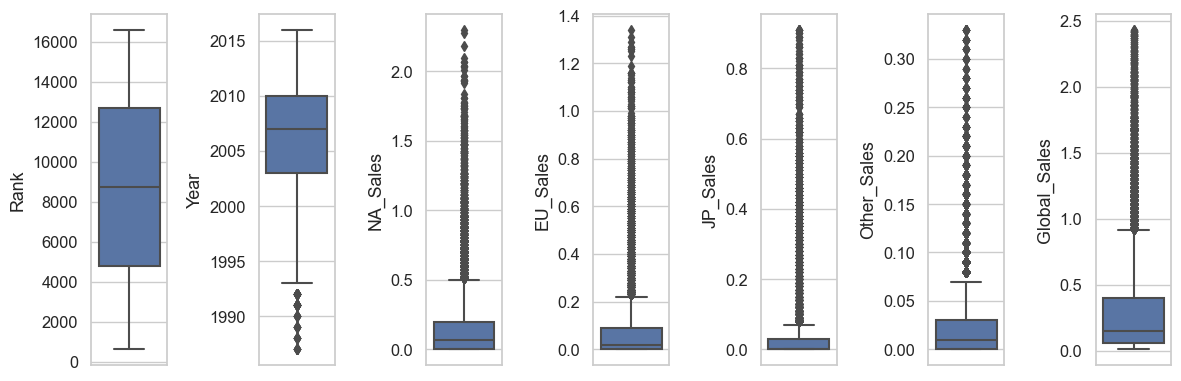

In [15]:
plt.figure(figsize=(12,4))
sns.set(font_scale=1.07)
sns.set_style('whitegrid')
for i in range(len(numeric_features)):
    plt.subplot(1, len(numeric_features), i+1)
    sns.boxplot(y=vg_filtered[numeric_features[i]], orient='v')
    plt.tight_layout()
plt.savefig('Boxplot_filtered.jpg')

Text(0, 0.5, 'Sales [in millions]')

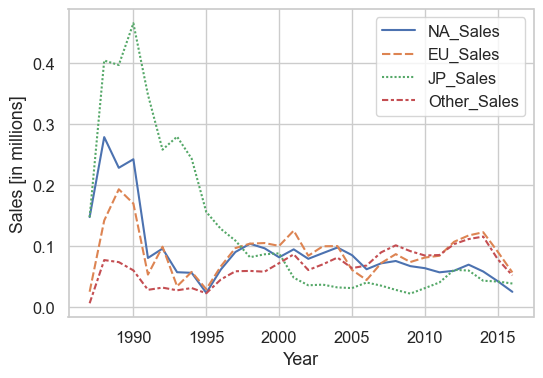

In [48]:
annual_sales = vg_filtered[sales_list].groupby(['Year']).mean()
plt.figure(figsize=(6, 4))
sns.lineplot(data=annual_sales)
plt.ylabel('Sales [in millions]')

Task 1c

Text(0, 0.5, 'NA Sales in $ Millions')

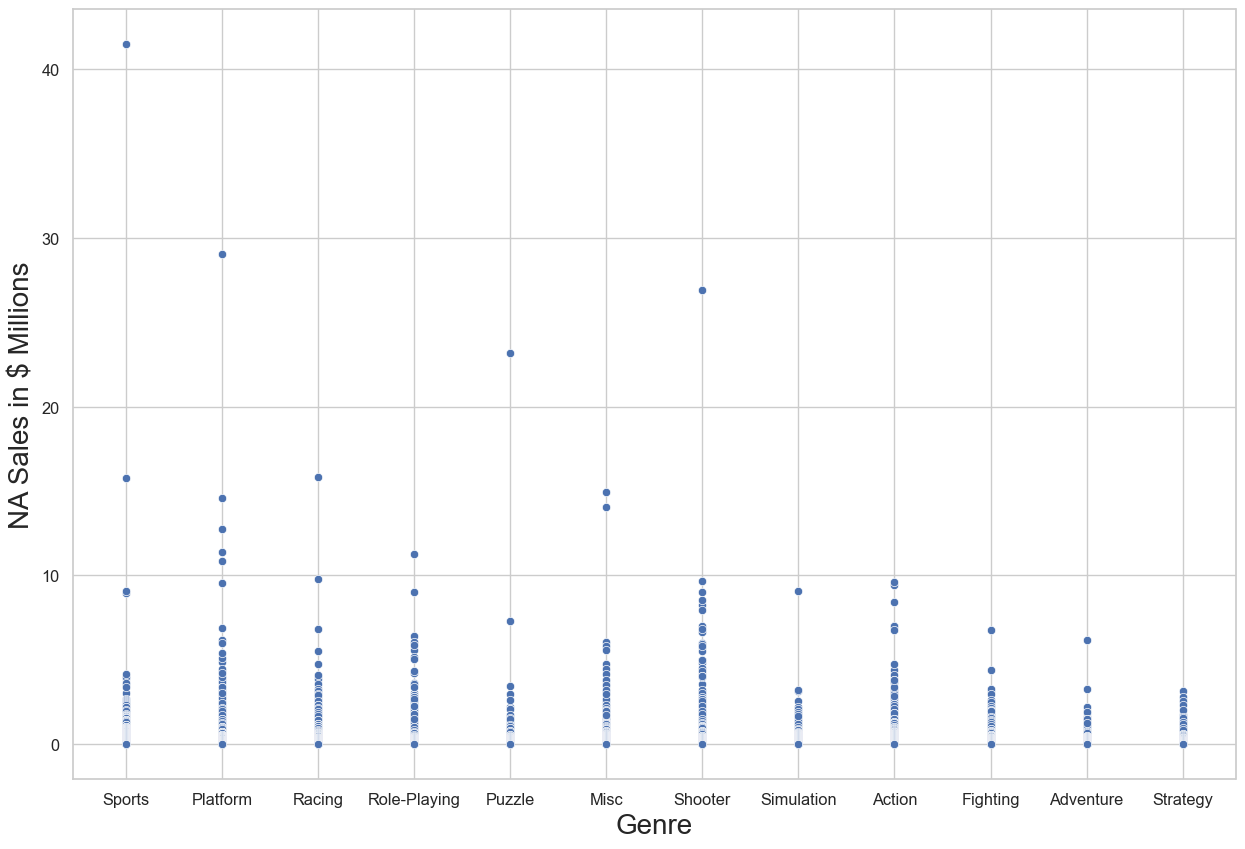

In [49]:
plt.figure(figsize = (15,10))
plot = sns.scatterplot(data = vgsales, x = "Genre", y = "NA_Sales")
plot.set_xlabel(xlabel = "Genre", fontsize = 20)
plot.set_ylabel(ylabel = "NA Sales in $ Millions", fontsize = 20)

Text(0.5, 1.0, 'Publishers')

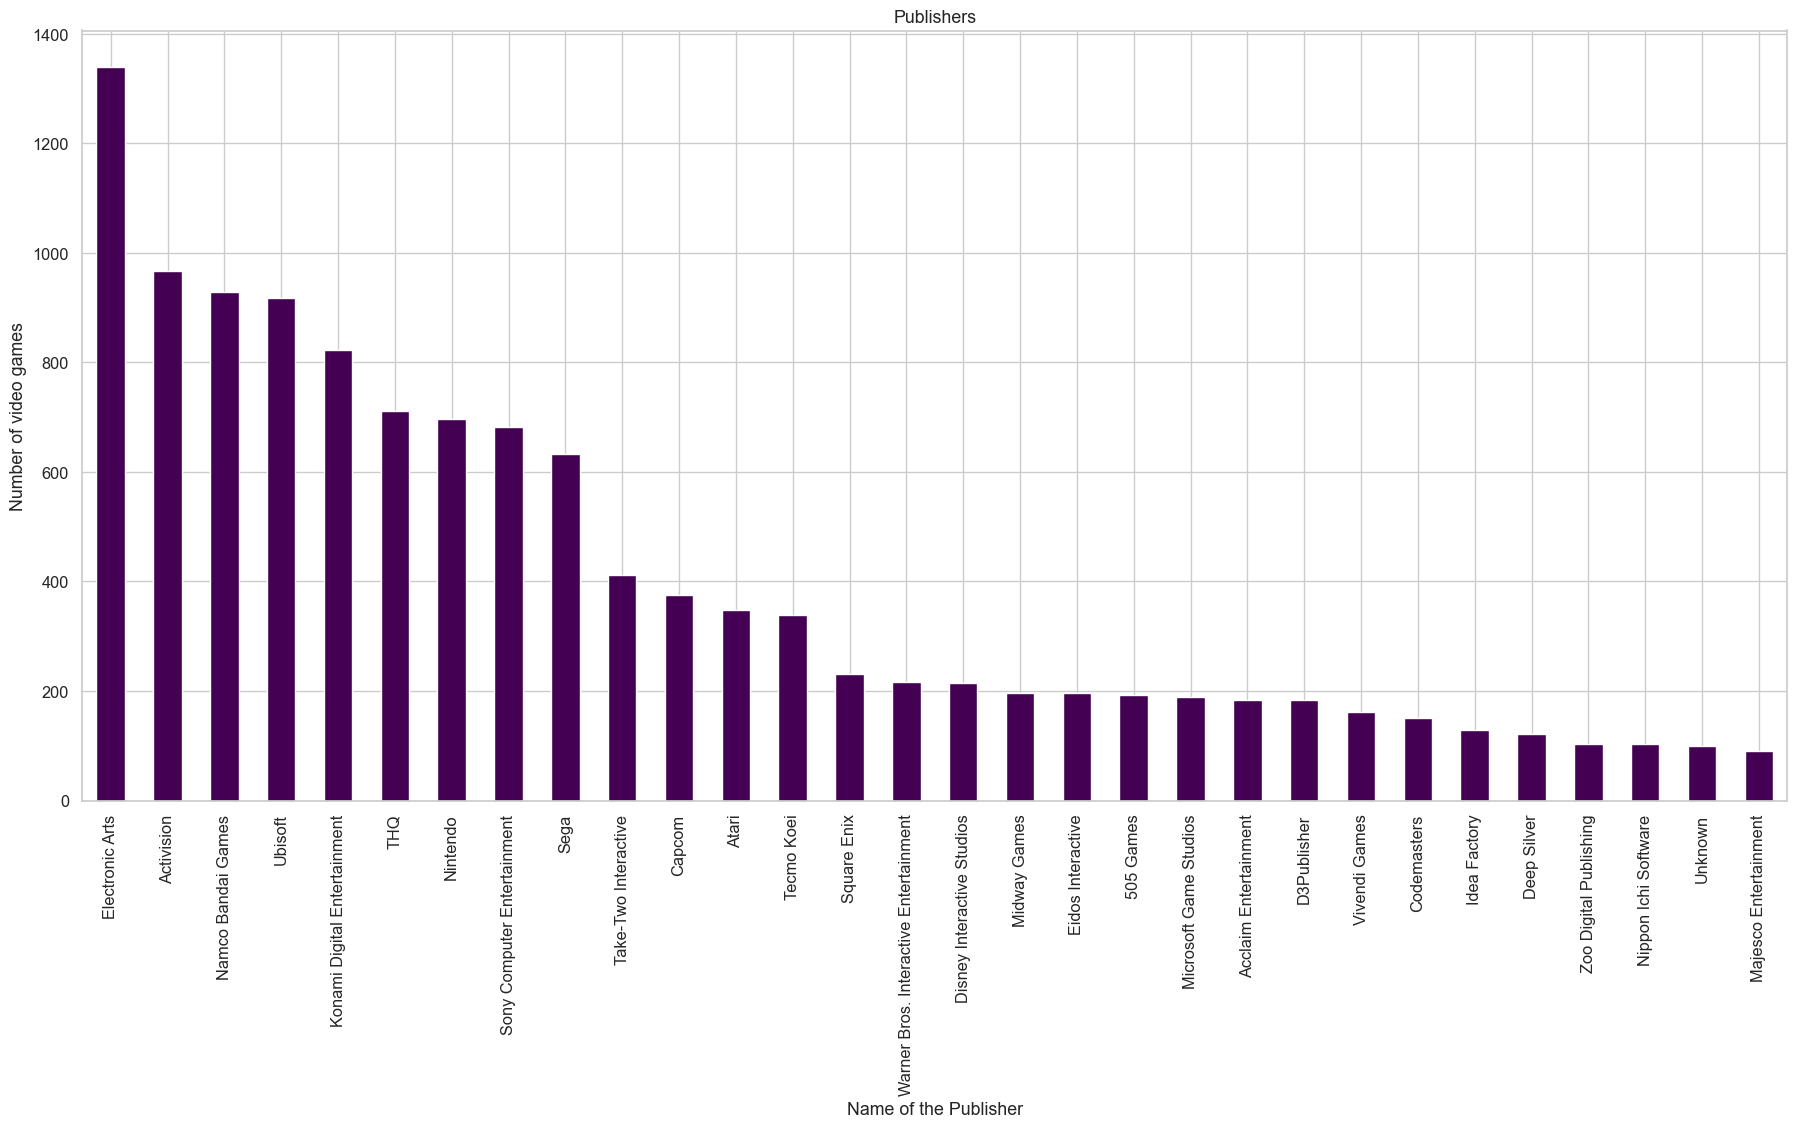

In [50]:
publisher_values = vgsales["Publisher"].value_counts().nlargest(30)

plt.figure(figsize = (22, 10))
publisher_values.plot(kind = "bar", colormap = "viridis")
plt.xlabel("Name of the Publisher")
plt.ylabel("Number of video games")
plt.title("Publishers")

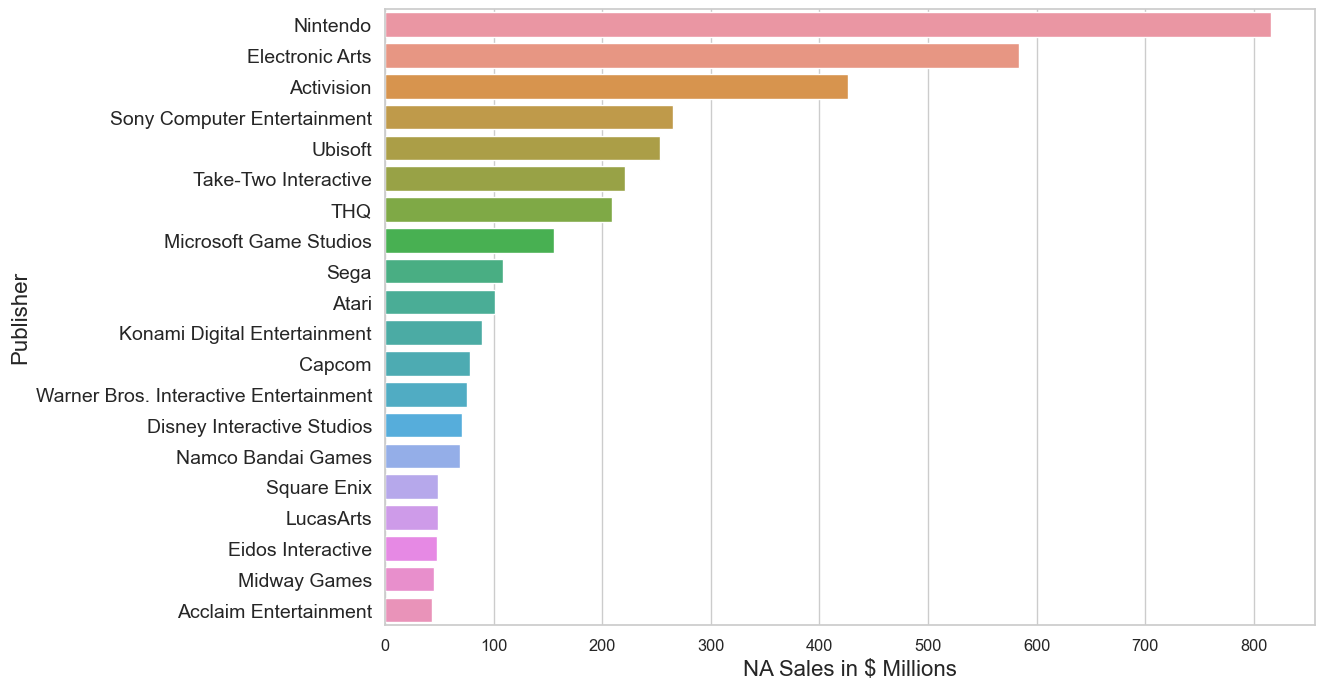

In [51]:
sales_publisher = vgsales.groupby("Publisher")["NA_Sales"].sum().nlargest(20)
sales_publisher = pd.DataFrame(sales_publisher.sort_values(ascending = False))
publishers = sales_publisher.index
sales_publisher.columns = ["Revenue"]

plt.figure(figsize = (12,8))
plot = sns.barplot(y = publishers , x = "Revenue", data = sales_publisher)
plot.set_xlabel(xlabel = "NA Sales in $ Millions", fontsize = 16)
plot.set_ylabel(ylabel = "Publisher", fontsize = 16)
plot.set_yticklabels(labels = publishers, fontsize = 14)
plt.show()


Task 2a, 2b

In [20]:
# Normalizing the numerical features

from sklearn.preprocessing import MinMaxScaler

scaled_features = ['Rank', 'NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
vg_filtered[scaled_features] = MinMaxScaler().fit_transform(vg_filtered[scaled_features])

In [21]:
# List of all categorical features in the dataset
categorical_features = ['Name', 'Platform', 'Genre', 'Publisher']

In [22]:
# Checking the number of unique values in each categorical feature
for feature in categorical_features:
    print(f'Number of {feature}s: {vg_filtered[feature].nunique()}')

Number of Names: 10791
Number of Platforms: 31
Number of Genres: 12
Number of Publishers: 557


In [23]:
# Looking at the mean sales for games on each platform
eu_sales = vg_filtered.groupby(['Platform'])
eu_sales['EU_Sales'].mean().sort_values(ascending=False)

Platform
PS4     0.165980
PS3     0.141625
XOne    0.141357
GB      0.139118
X360    0.129477
NES     0.115806
WiiU    0.114412
PS      0.113384
PC      0.105574
PS2     0.101264
GEN     0.096957
Wii     0.087353
N64     0.072062
GBA     0.071477
XB      0.067767
SCD     0.060000
3DS     0.058819
GC      0.056842
DS      0.041006
PSV     0.039877
PSP     0.038039
DC      0.032500
SNES    0.016683
2600    0.016000
SAT     0.001628
GG      0.000000
TG16    0.000000
WS      0.000000
3DO     0.000000
PCFX    0.000000
NG      0.000000
Name: EU_Sales, dtype: float64

In [24]:
# For grouping platform values together

transformed_platform = {
    ('PS4', 'PS3', 'XOne', 'GB', 'X360'): 'High Selling',
    ('NES', 'WiiU', 'PS', 'PC', 'PS2', 'GEN'): 'Mid-High Selling',
    ('Wii', 'N64', 'GBA', 'XB', 'SCD', '3DS', 'GC'): 'Mid-Selling',
    ('DS', 'PSV', 'PSP', 'DC', 'SNES', '2600'): 'Mid-Low Selling',
    ('3DO', 'PCFX', 'WS', 'TG16', 'NG', 'GG', 'SAT'): 'Low Selling'
}

In [25]:
# Changing the values of platform features in the dataset

platform_dict = {platform: value for subset, value in transformed_platform.items()
                 for platform in subset}
vg_filtered['Platform'] = vg_filtered['Platform'].replace(platform_dict)

Task 3a

In [26]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into a training and test set with the relevant features

features = ['Rank', 'Platform', 'Genre', 'NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
x = vg_filtered[features]
y = vg_filtered.EU_Sales
train_X, test_X, train_y, test_y = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

In [27]:
from sklearn.preprocessing import OneHotEncoder

# Implementing the one-hot encoder columns

oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
oh_columns_train = pd.DataFrame(oh_encoder.fit_transform(train_X[['Platform', 'Genre']]))
oh_columns_test = pd.DataFrame(oh_encoder.transform(test_X[['Platform', 'Genre']])) 
oh_columns_train.index = train_X.index
oh_columns_test.index = test_X.index

In [28]:
numerical_train_X = train_X.drop(['Platform', 'Genre'], axis=1)
numerical_test_X = test_X.drop(['Platform', 'Genre'], axis=1)
oh_train_X = pd.concat([numerical_train_X, oh_columns_train], axis=1)
oh_test_X = pd.concat([numerical_test_X, oh_columns_test], axis=1)
oh_train_X.columns = oh_train_X.columns.astype(str)
oh_test_X.columns = oh_test_X.columns.astype(str)

3b, 3c

In [30]:
# Creating function for getting mae, mse and r2 scores from the cross validation
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1)

def crossValidationErrors(model, x_train, y_train):
    mae = -1 * cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    mse = -1 * cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    r2 = cross_val_score(model, x_train, y_train, cv=kf, scoring='r2')
    return mae, mse, r2

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
# Checking performance of linear regression with only numerical features

without_cat = ['Rank', 'NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
linear_model = LinearRegression()
mae, mse, r2 = crossValidationErrors(linear_model, train_X[without_cat], train_y)
print(f'Mean Absolute Error: {mae.mean()}')
print(f'Mean Squared Error: {mse.mean()}')
print(f'R2 Score: {r2.mean()}')

Mean Absolute Error: 0.0030227381487175553
Mean Squared Error: 2.6562082368826824e-05
R2 Score: 0.9988813714208196


In [33]:
# Checking performance of linear regression with all relevant features

linear_model = LinearRegression()
mae, mse, r2 = crossValidationErrors(linear_model, oh_train_X, train_y)
print(f'Mean Absolute Error: {mae.mean()}')
print(f'Mean Squared Error: {mse.mean()}')
print(f'R2 Score: {r2.mean()}')

Mean Absolute Error: 0.0030441976667765673
Mean Squared Error: 2.6623177940264217e-05
R2 Score: 0.998878804982942


In [34]:
# Checking performance of decision tree with only numerical features

tree_model = DecisionTreeRegressor(random_state=1)
mae, mse, r2 = crossValidationErrors(tree_model, train_X[without_cat], train_y)
print(f'Mean Absolute Error: {mae.mean()}')
print(f'Mean Squared Error: {mse.mean()}')
print(f'R2 Score: {r2.mean()}')

Mean Absolute Error: 0.01314060515998063
Mean Squared Error: 0.0016458407026808282
R2 Score: 0.9306001421738156


In [35]:
# Checking performance of decision tree with all relevant features

tree_model = DecisionTreeRegressor(random_state=1)
mae, mse, r2 = crossValidationErrors(tree_model, oh_train_X, train_y)
print(f'Mean Absolute Error: {mae.mean()}')
print(f'Mean Squared Error: {mse.mean()}')
print(f'R2 Score: {r2.mean()}')

Mean Absolute Error: 0.01472231734743295
Mean Squared Error: 0.002128994463867531
R2 Score: 0.9098174037308213


In [36]:
# Checking performance of random forest with only numerical features

forest_model = RandomForestRegressor(random_state=1)
mae, mse, r2 = crossValidationErrors(forest_model, train_X[without_cat], train_y)
print(f'Mean Absolute Error: {mae.mean()}')
print(f'Mean Squared Error: {mse.mean()}')
print(f'R2 Score: {r2.mean()}')

Mean Absolute Error: 0.009694768255305602
Mean Squared Error: 0.000812699273503851
R2 Score: 0.9659612249714667


In [37]:
# Checking performance of random forest with all relevant features

forest_model = RandomForestRegressor(random_state=1)
mae, mse, r2 = crossValidationErrors(forest_model, oh_train_X, train_y)
print(f'Mean Absolute Error: {mae.mean()}')
print(f'Mean Squared Error: {mse.mean()}')
print(f'R2 Score: {r2.mean()}')

Mean Absolute Error: 0.010461447703616233
Mean Squared Error: 0.0009188482129254926
R2 Score: 0.9615448276331527


In [38]:
# Function for finding the optimal number of max leaf nodes in decision tree

def adjustParametersTree(leaf_nodes):
    maes = -1 * cross_val_score(DecisionTreeRegressor(max_leaf_nodes=leaf_nodes, random_state=1),
                                 train_X[without_cat], train_y, cv=5, scoring='neg_mean_absolute_error')
    return maes.mean()

In [39]:
# Function for finding the optimal number of estimators in random forest

def adjustParametersForest(tree_number):
    maes = -1 * cross_val_score(RandomForestRegressor(n_estimators=tree_number, random_state=1),
                                 train_X[without_cat], train_y, cv=5, scoring='neg_mean_absolute_error')
    return maes.mean()

In [56]:
# Finding optimal number of leaf nodes

leaf_nodes = np.linspace(1000, 3800, 20, dtype=int)
tree_errors = []
for leaf in leaf_nodes:
    error = adjustParametersTree(leaf)
    tree_errors.append(error)
tree_errors

[0.01522847567189286,
 0.014875568801252289,
 0.014629927966506594,
 0.014461436435119462,
 0.014257013313920966,
 0.01408809247467839,
 0.013999677952307735,
 0.013922967228123398,
 0.013844481563832986,
 0.013796652048468144,
 0.013754817668612421,
 0.013740191186173914,
 0.013689829193112674,
 0.013674699064591183,
 0.013659375512428521,
 0.013655517094184333,
 0.013631279795783482,
 0.013598246946668701,
 0.013598246946668701,
 0.013598246946668701]

<Axes: >

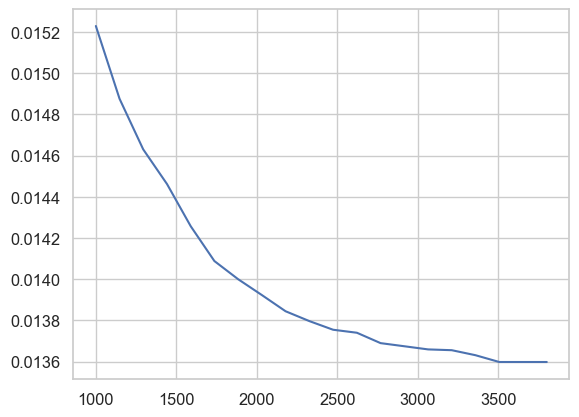

In [57]:
sns.lineplot(x=leaf_nodes, y=tree_errors)

In [42]:
# Finding optimal number of estimators

estimators = [750, 850, 950, 1050, 1150, 1250, 1350]
errors = []
for estimator in estimators:
    error = adjustParametersForest(estimator)
    errors.append(error)
errors

[0.00968005083511902,
 0.009670193213813402,
 0.00967131768786557,
 0.009670288696142828,
 0.009668920620452996,
 0.009666693241075558,
 0.009663142008683798]

<Axes: >

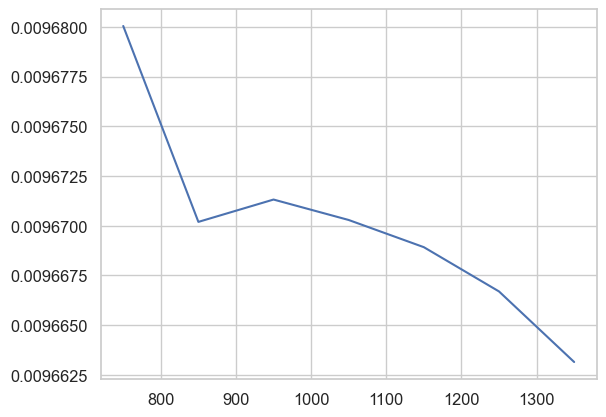

In [43]:
sns.lineplot(x=estimators, y=errors)

Task 4a

In [58]:
# Models with optimal parameters, decision tree best with default

linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=1)
forest_model = RandomForestRegressor(n_estimators=1350, random_state=1)

In [59]:
# Fitting the models to the training data

linear_model.fit(train_X[without_cat], train_y)
tree_model.fit(train_X[without_cat], train_y)
forest_model.fit(train_X[without_cat], train_y)

RandomForestRegressor(n_estimators=1350, random_state=1)

In [60]:
# Predictions on the test festures

linear_predictions = linear_model.predict(test_X[without_cat])
tree_predictions = tree_model.predict(test_X[without_cat])
forest_predictions = forest_model.predict(test_X[without_cat])

Task 4b

In [61]:
# Mean Absolute Error of the predictions on the test variables

linear_mae = mean_absolute_error(linear_predictions, test_y)
tree_mae = mean_absolute_error(tree_predictions, test_y)
forest_mae = mean_absolute_error(forest_predictions, test_y)
print(f'Linear Regression Mean Absolute Error: {linear_mae}')
print(f'Decision Tree Mean Absolute Error: {tree_mae}')
print(f'Random Forest Mean Absolute Error: {forest_mae}')

Linear Regression Mean Absolute Error: 0.003072871094186678
Decision Tree Mean Absolute Error: 0.013947882736156355
Random Forest Mean Absolute Error: 0.009618948003378019
